In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-overload/mushroom_overload.csv


In [2]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Import Logistic Regression,Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


# Import Classification Report function
from sklearn.metrics import classification_report

In [3]:
# Read the file
df=pd.read_csv('/kaggle/input/mushroom-overload/mushroom_overload.csv')

/tmp/ipykernel_36/4018831359.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/mushroom-overload/mushroom_overload.csv')


In [4]:
# Use the head() function to display the first 5 rows of the data
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w


In [5]:
# Use value_counts() method on "class" column of data object
classes=df['class'].value_counts()

# Print the result
classes

class
p    3680184
e    3042932
Name: count, dtype: int64

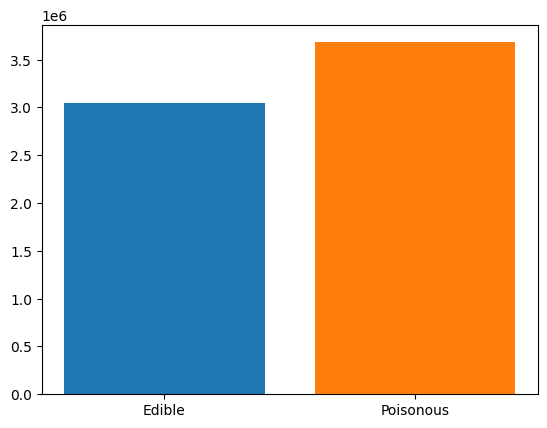

In [6]:
# Add the bar for edible class
plt.bar('Edible',classes['e'])

# Add the bar for poisonous class
plt.bar('Poisonous',classes['p'])

# Print the plot
plt.show()

In [7]:
# Create the x variable for features
x=df.loc[:,['cap-shape','cap-color','has-ring','ring-type']]

# Create the y variable for output labels
y=df.loc[:,['class']]

In [8]:
# Create an LabelEncoder object
encoder=LabelEncoder()

# Encode the features to integers inside a for loop
for i in x.columns:
  x[i]=encoder.fit_transform(x[i])

# Encode the output labels to integers
y=encoder.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Print x
x

,cap-shape,cap-color,has-ring,ring-type
0,2,1,1,2
1,6,1,1,2
2,2,6,1,5
3,2,1,1,2
4,6,1,1,5
...,...,...,...,...
6723111,2,11,0,1
6723112,2,11,0,1
6723113,2,11,0,1
6723114,5,11,0,1


In [10]:
# Print y
y

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
# Split the dataset into train and test sets with 70-30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
# Create an object using the LogisticRegression() Class
logistic_classifier_model=LogisticRegression()


# Create an object using the RidgeClassifier() Class
ridge_classifier_model=RidgeClassifier()


# Create an object using the DecisionTreeClassifier() Class
decision_tree_model=DecisionTreeClassifier()


# Create an object using the GaussianNB() Class
naive_bayes_model=GaussianNB()


# Create an object using the MLPClassifier() Class
neural_network_model=MLPClassifier()

In [ ]:
# Train the Logistic Classifier model
logistic_classifier_model.fit(x_train,y_train)

# Train the Ridge Classifier model
ridge_classifier_model.fit(x_train,y_train)

# Train the Decision Tree model
decision_tree_model.fit(x_train,y_train)

# Train the Naive Bayes model
naive_bayes_model.fit(x_train,y_train)

# Train the Neural Network model
neural_network_model.fit(x_train,y_train)

In [ ]:
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred=logistic_classifier_model.predict(x_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred=ridge_classifier_model.predict(x_test)

# Make prediction using the test dataset on Decision Tree model
tree_pred=decision_tree_model.predict(x_test)

# Make prediction using the test dataset on Naive Bayes model
naive_bayes_pred=naive_bayes_model.predict(x_test)

# Make prediction using the test dataset on Neural Network model
neural_network_pred=neural_network_model.predict(x_test)

In [ ]:
# Create a Classification Report for Logistic Classifier model
logistic_report=classification_report(y_test,logistic_pred)

# Create a Classification Report for Ridge Classifier model
ridge_report=classification_report(y_test,ridge_pred)

# Create a Classification Report for Decision Tree model
tree_report=classification_report(y_test,tree_pred)

# Create a Classification Report for Naive Bayes model
naive_bayes_report=classification_report(y_test,naive_bayes_pred)

# Create a Classification Report for Neural Network model
neural_network_report=classification_report(y_test,neural_network_pred)

In [ ]:
# Print the report of the Logistic Regression model
print('***** Logistic Regression *****')
print(logistic_report)

# Print the report of the Ridge Classifier model
print('***** Ridge Classifier *****')
print(ridge_report)

# Print the report of the Decision Tree model
print('***** Decision Tree *****')
print(tree_report)

# Print the report of the Naive Bayes model
print('***** Naive Bayes *****')
print(naive_bayes_report)

# Print the report of the Neural Network model
print('***** Neural Network *****')
print(neural_network_report)

In [ ]:
# Output
***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.47      0.30      0.36    912871
           1       0.55      0.72      0.62   1104064

    accuracy                           0.53   2016935
   macro avg       0.51      0.51      0.49   2016935
weighted avg       0.51      0.53      0.51   2016935

***** Ridge Classifier *****
              precision    recall  f1-score   support

           0       0.47      0.30      0.36    912871
           1       0.55      0.72      0.62   1104064

    accuracy                           0.53   2016935
   macro avg       0.51      0.51      0.49   2016935
weighted avg       0.51      0.53      0.51   2016935

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.65      0.80      0.72    912871
           1       0.79      0.64      0.71   1104064

    accuracy                           0.71   2016935
   macro avg       0.72      0.72      0.71   2016935
weighted avg       0.73      0.71      0.71   2016935

***** Naive Bayes *****
              precision    recall  f1-score   support

           0       0.49      0.52      0.50    912871
           1       0.58      0.56      0.57   1104064

    accuracy                           0.54   2016935
   macro avg       0.54      0.54      0.54   2016935
weighted avg       0.54      0.54      0.54   2016935

***** Neural Network *****
              precision    recall  f1-score   support

           0       0.66      0.76      0.70    912871
           1       0.77      0.67      0.72   1104064

    accuracy                           0.71   2016935
   macro avg       0.71      0.72      0.71   2016935
weighted avg       0.72      0.71      0.71   2016935




In [ ]:
# Create Random Forest Classifier object,train it and make predictions
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
random_forest_pred=random_forest_model.predict(x_test)

In [ ]:
# Create a classification Report for Random Forest model
random_forest_report=classification_report(y_test,random_forest_pred)

# Print the classification report
print(random_forest_report)

In [ ]:
# Output  
    precision    recall  f1-score   support

           0       0.65      0.80      0.72    912871
           1       0.79      0.64      0.71   1104064

    accuracy                           0.71   2016935
   macro avg       0.72      0.72      0.71   2016935
weighted avg       0.73      0.71      0.71   2016935
